In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2020-12-15T17:00:00,6,Friuli Venezia Giulia,654,56,710,13229,13939,-149,829,...,52.0,9766.0,3845.0,-141.0,7.89,5.09,8.49,21.56,-3.45,-1.06
295,2020-12-16T17:00:00,6,Friuli Venezia Giulia,634,54,688,13063,13751,-188,779,...,40.0,8826.0,2002.0,-166.0,7.85,5.00,8.83,38.91,-3.57,-1.35
296,2020-12-17T17:00:00,6,Friuli Venezia Giulia,630,57,687,12534,13221,-530,707,...,27.0,9096.0,1938.0,-529.0,8.30,5.20,7.77,36.48,5.56,-3.85
297,2020-12-18T17:00:00,6,Friuli Venezia Giulia,601,59,660,13091,13751,530,753,...,33.0,7781.0,0.0,557.0,8.94,4.80,9.68,0.00,3.51,4.01


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 974
Nuovi tamponi: 10096.0
Percentuale nuovi positivi/nuovi tamponi: 9.6 %
Nuovi guariti: 1236.0
Nuovi deceduti: 9.0
Variazione positivi ricoverati con sintomi: -7.0
Variazione positivi in terapia intensiva: -4.0
Variazione positivi in isolamento dimiciliare: -260.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 19, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,6,Friuli Venezia Giulia,65,14,79,1853,1932,-236,131,...,2.0,3915.0,1219.0,-240.0,17.72,4.09,3.35,10.75,7.69,-10.89
1,2020-10-21T17:00:00,6,Friuli Venezia Giulia,76,16,92,2014,2106,174,219,...,1.0,4627.0,1332.0,161.0,17.39,4.37,4.73,16.44,14.29,9.01
2,2020-10-22T17:00:00,6,Friuli Venezia Giulia,83,14,97,2128,2225,119,220,...,1.0,5510.0,1715.0,114.0,14.43,4.36,3.99,12.83,-12.50,5.65
3,2020-10-23T17:00:00,6,Friuli Venezia Giulia,88,19,107,2370,2477,252,340,...,1.0,5301.0,1559.0,242.0,17.76,4.32,6.41,21.81,35.71,11.33
4,2020-10-24T17:00:00,6,Friuli Venezia Giulia,100,16,116,2660,2776,299,412,...,3.0,6521.0,2011.0,290.0,13.79,4.18,6.32,20.49,-15.79,12.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-15T17:00:00,6,Friuli Venezia Giulia,654,56,710,13229,13939,-149,829,...,52.0,9766.0,3845.0,-141.0,7.89,5.09,8.49,21.56,-3.45,-1.06
57,2020-12-16T17:00:00,6,Friuli Venezia Giulia,634,54,688,13063,13751,-188,779,...,40.0,8826.0,2002.0,-166.0,7.85,5.00,8.83,38.91,-3.57,-1.35
58,2020-12-17T17:00:00,6,Friuli Venezia Giulia,630,57,687,12534,13221,-530,707,...,27.0,9096.0,1938.0,-529.0,8.30,5.20,7.77,36.48,5.56,-3.85
59,2020-12-18T17:00:00,6,Friuli Venezia Giulia,601,59,660,13091,13751,530,753,...,33.0,7781.0,0.0,557.0,8.94,4.80,9.68,0.00,3.51,4.01


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

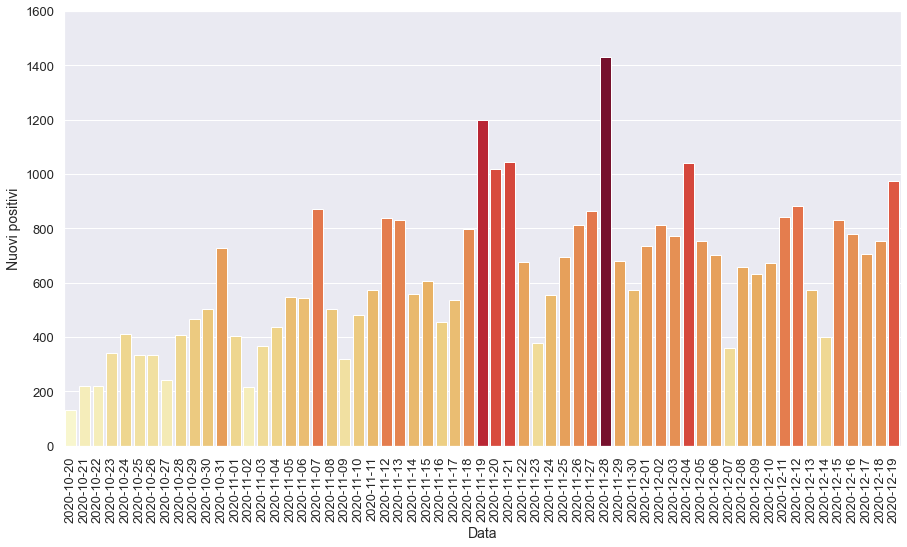

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

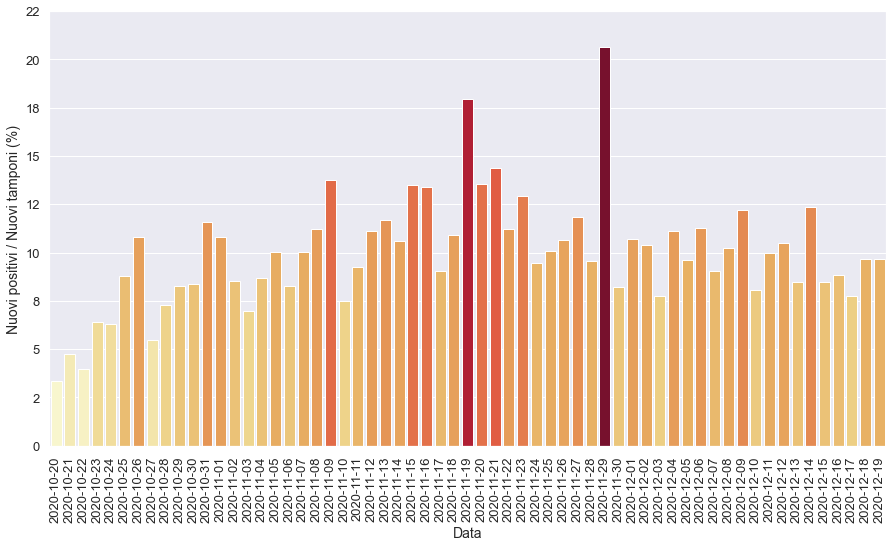

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

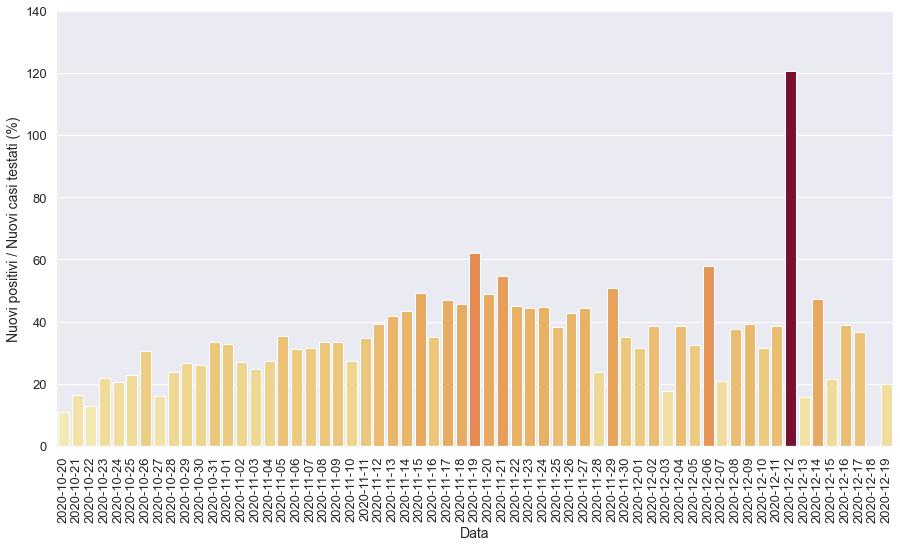

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

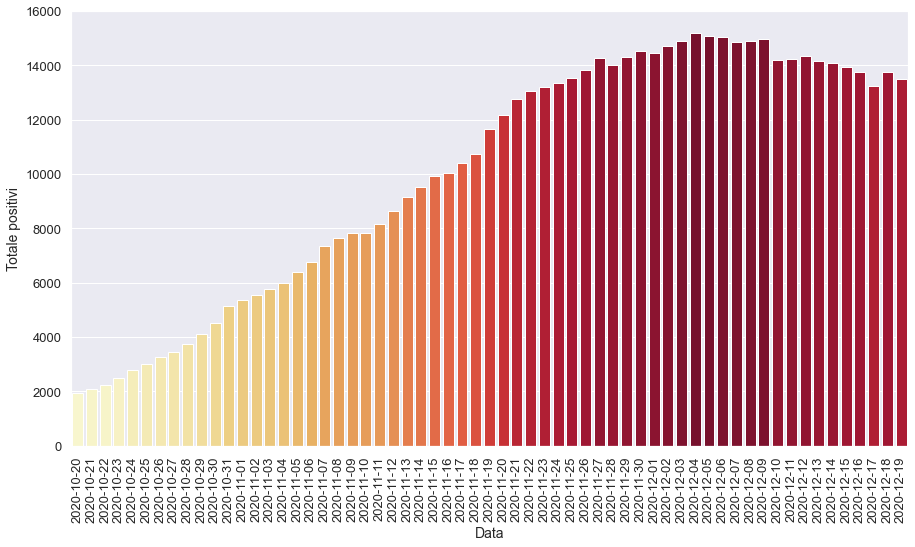

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

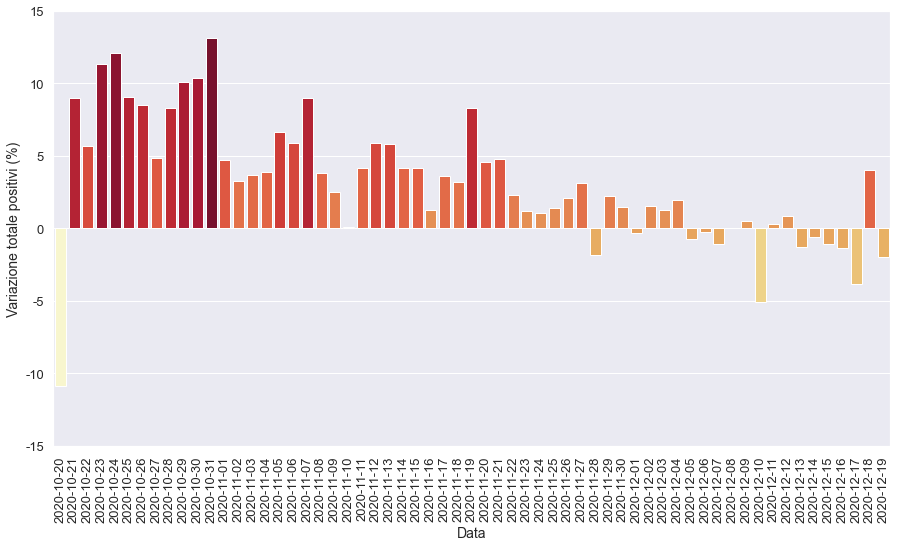

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

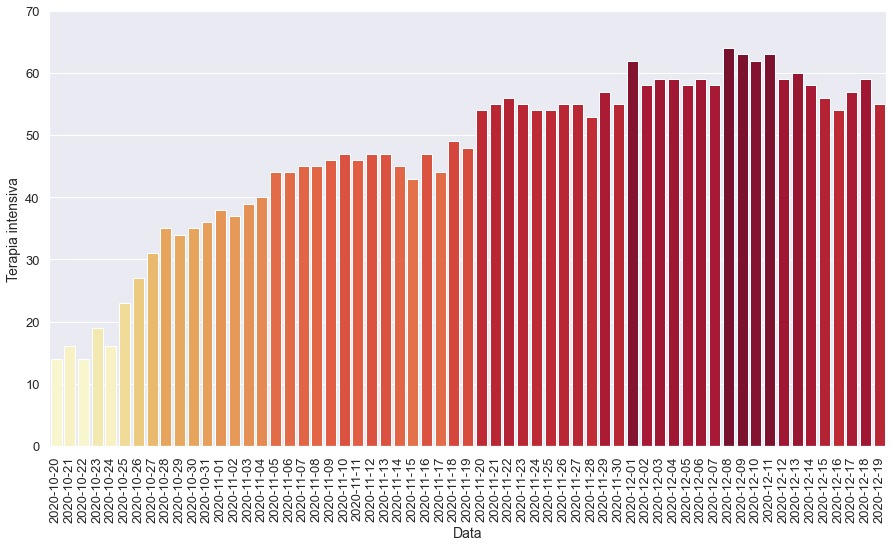

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

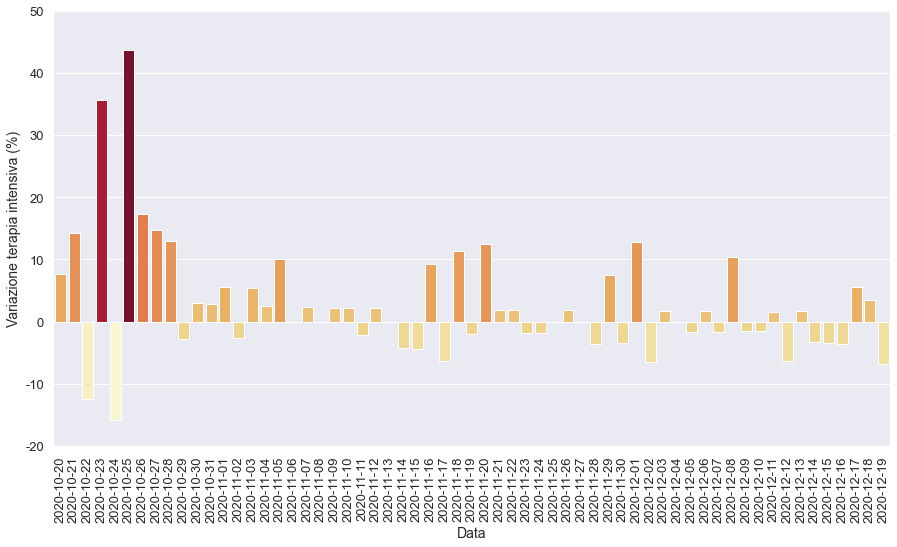

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

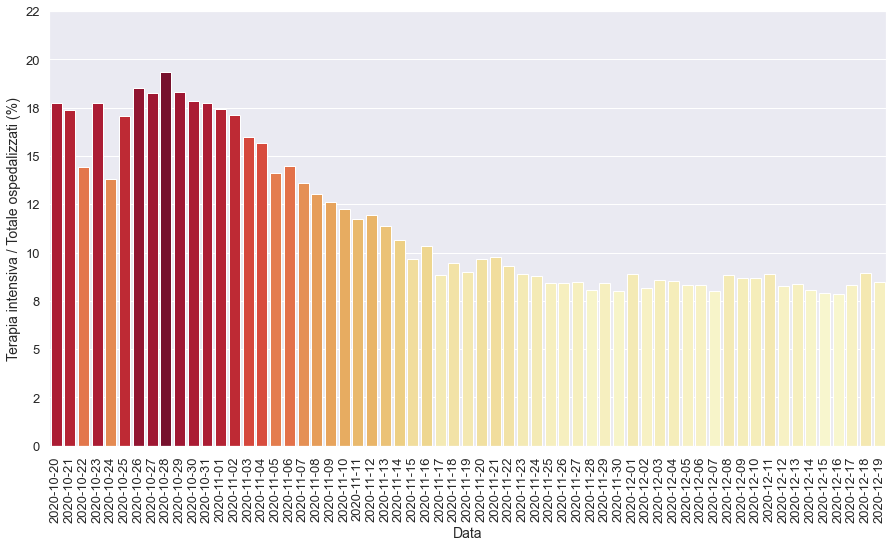

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

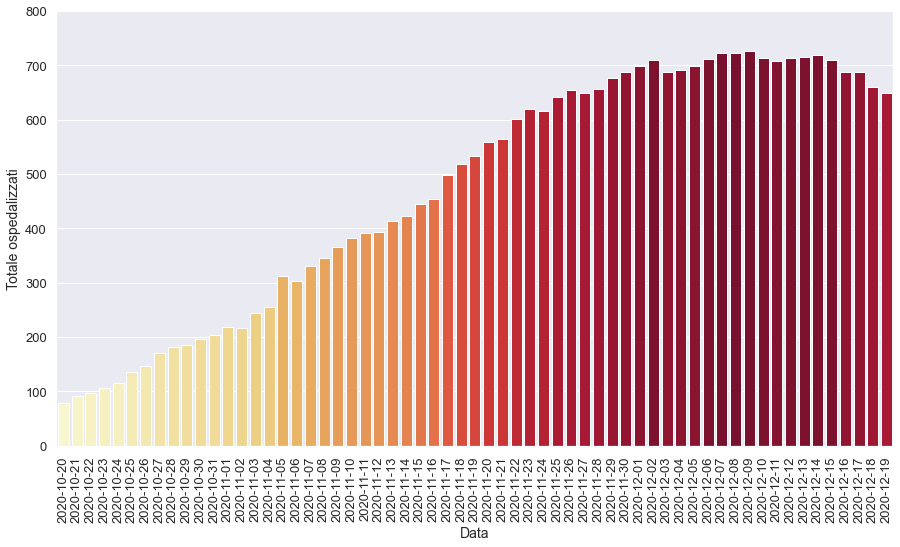

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

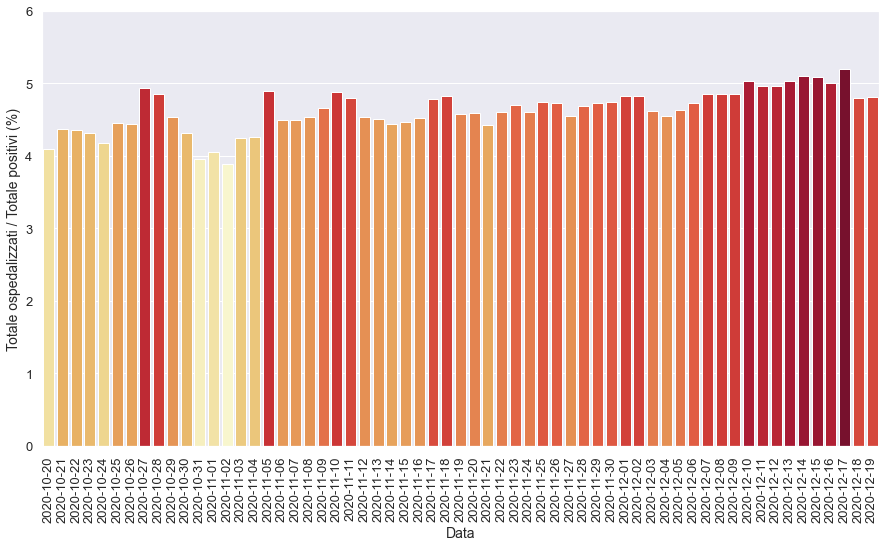

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

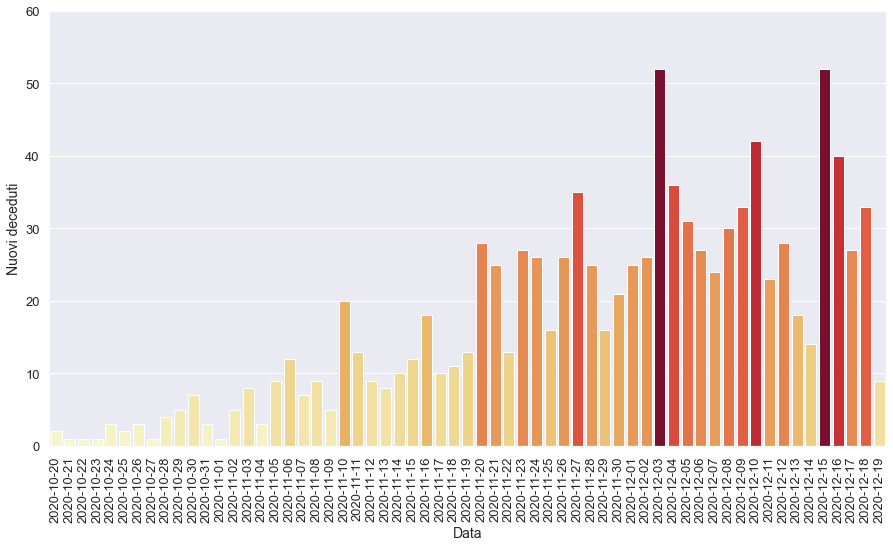

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

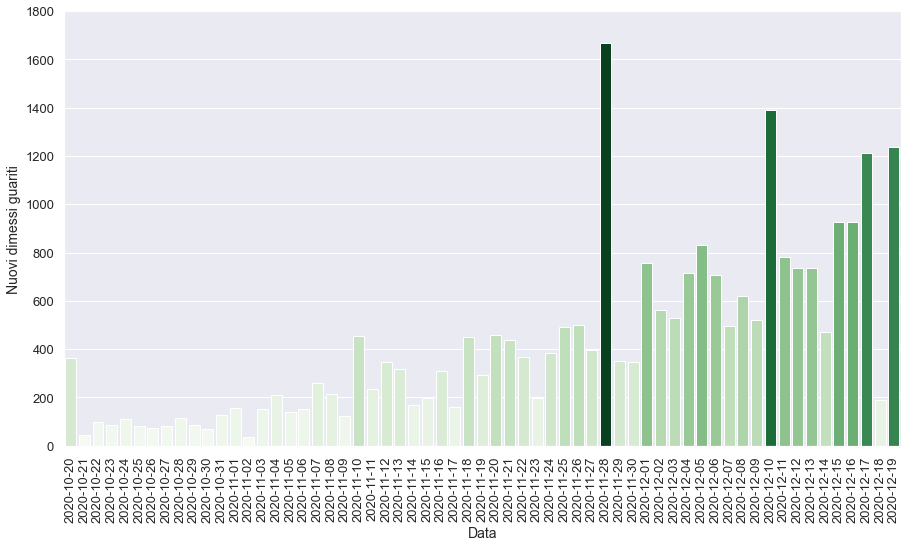

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-19T17:00:00,6,Friuli Venezia Giulia,485,48,533,11112,11645,891,1197,...,13.0,6680.0,1930.0,877.0,9.01,4.58,17.92,62.02,-2.04,8.29
1,2020-11-20T17:00:00,6,Friuli Venezia Giulia,505,54,559,11616,12175,530,1018,...,28.0,7522.0,2086.0,504.0,9.66,4.59,13.53,48.80,12.50,4.55
2,2020-11-21T17:00:00,6,Friuli Venezia Giulia,509,55,564,12193,12757,582,1043,...,25.0,7258.0,1908.0,577.0,9.75,4.42,14.37,54.66,1.85,4.78
3,2020-11-22T17:00:00,6,Friuli Venezia Giulia,545,56,601,12450,13051,294,675,...,13.0,6024.0,1502.0,257.0,9.32,4.61,11.21,44.94,1.82,2.30
4,2020-11-23T17:00:00,6,Friuli Venezia Giulia,565,55,620,12585,13205,154,377,...,27.0,2916.0,850.0,135.0,8.87,4.70,12.93,44.35,-1.79,1.18
5,2020-11-24T17:00:00,6,Friuli Venezia Giulia,561,54,615,12732,13347,142,554,...,26.0,5864.0,1244.0,147.0,8.78,4.61,9.45,44.53,-1.82,1.08
6,2020-11-25T17:00:00,6,Friuli Venezia Giulia,588,54,642,12894,13536,189,696,...,16.0,6910.0,1814.0,162.0,8.41,4.74,10.07,38.37,0.00,1.42
7,2020-11-26T17:00:00,6,Friuli Venezia Giulia,599,55,654,13168,13822,286,814,...,26.0,7626.0,1903.0,274.0,8.41,4.73,10.67,42.77,1.85,2.11
8,2020-11-27T17:00:00,6,Friuli Venezia Giulia,594,55,649,13606,14255,433,864,...,35.0,7284.0,1947.0,438.0,8.47,4.55,11.86,44.38,0.00,3.13
9,2020-11-28T17:00:00,6,Friuli Venezia Giulia,604,53,657,13339,13996,-259,1432,...,25.0,15001.0,6029.0,-267.0,8.07,4.69,9.55,23.75,-3.64,-1.82


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

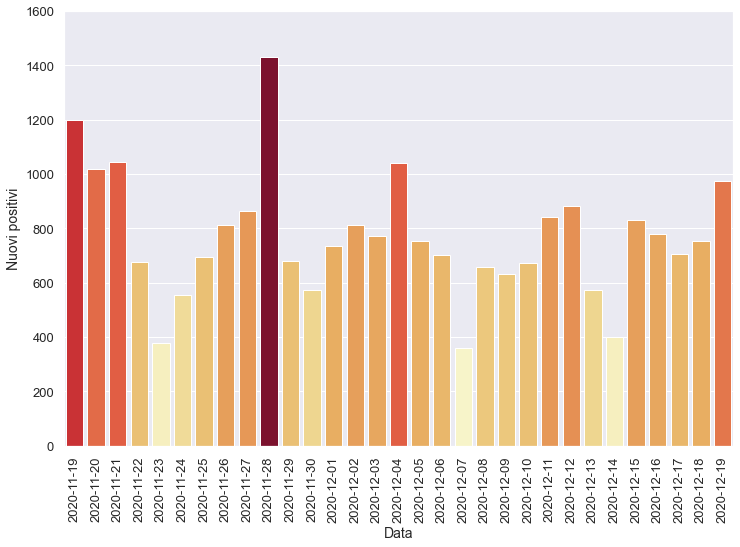

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

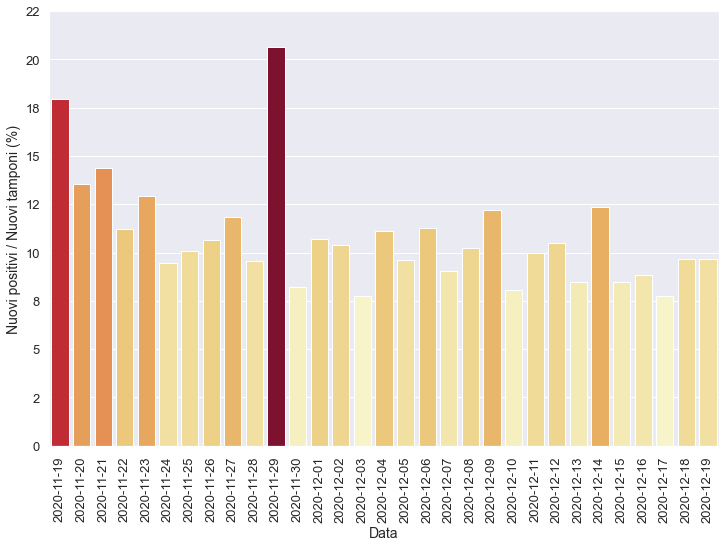

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

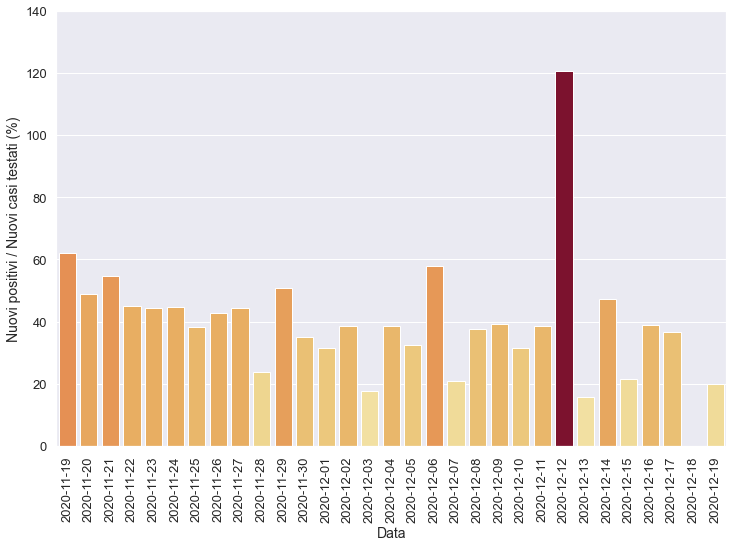

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

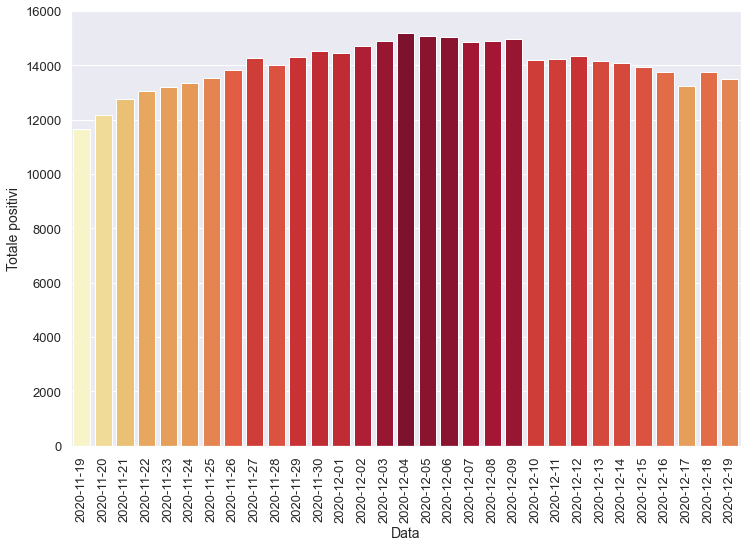

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

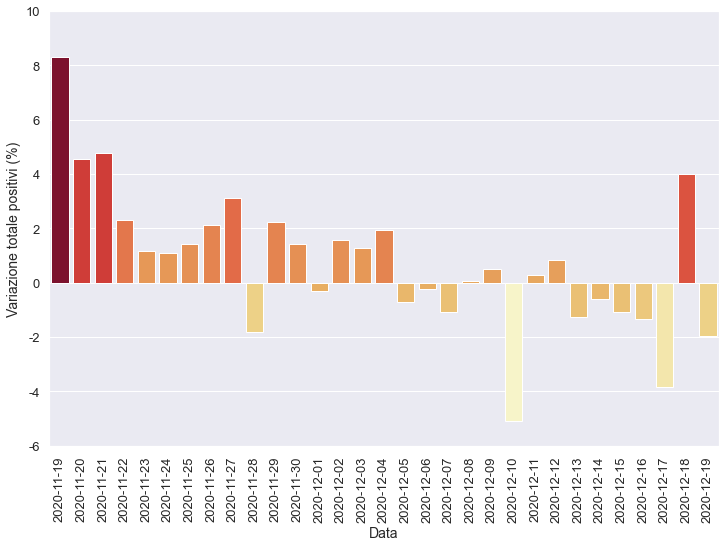

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

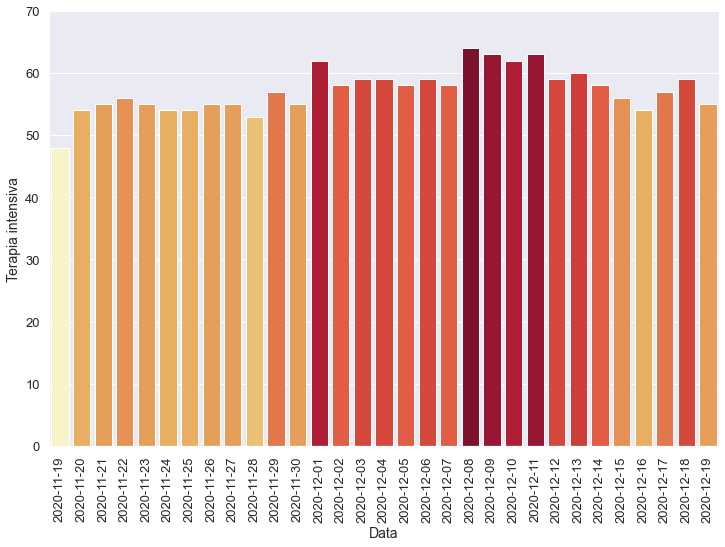

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

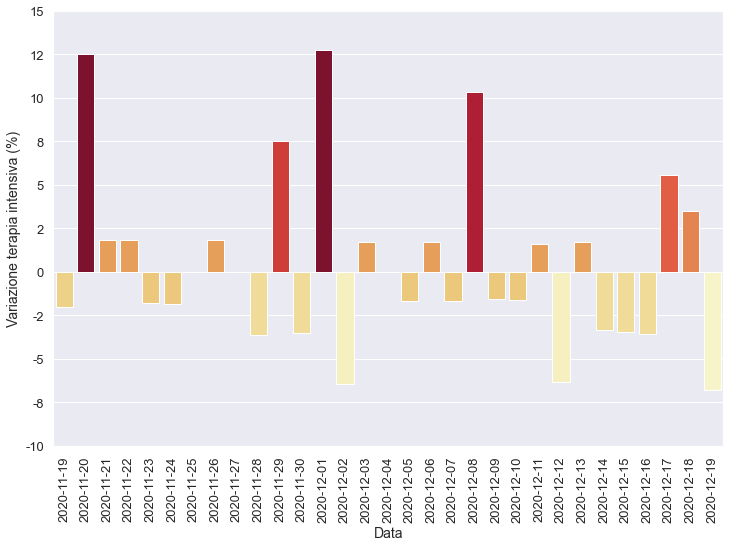

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

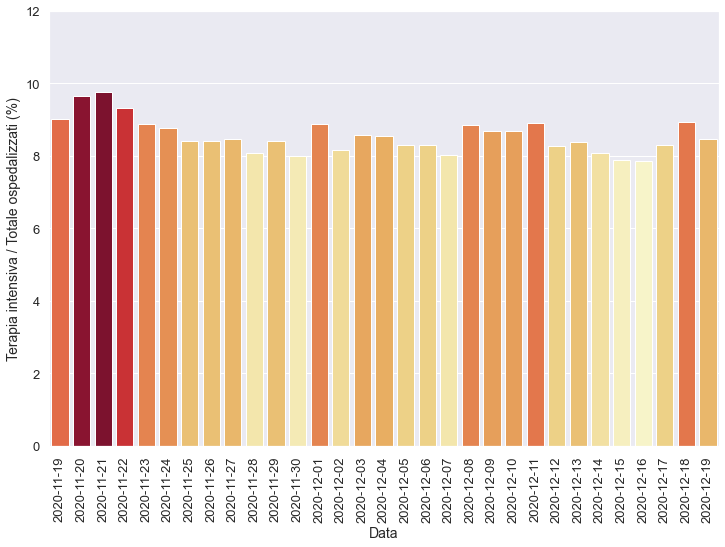

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

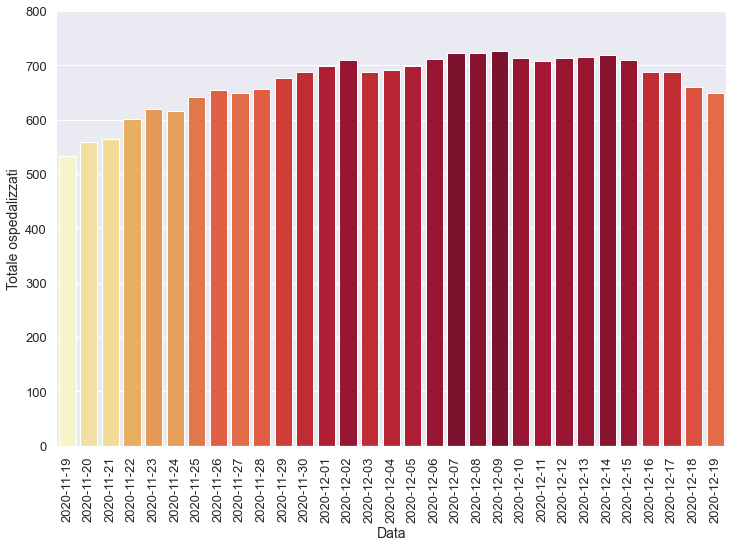

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

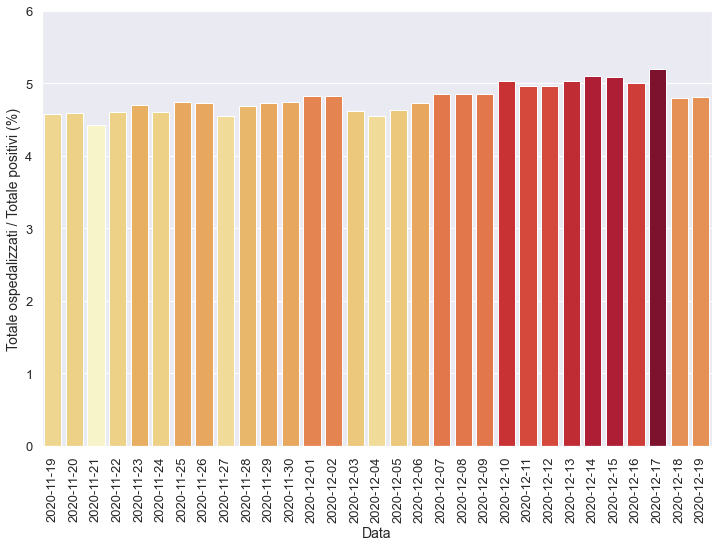

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

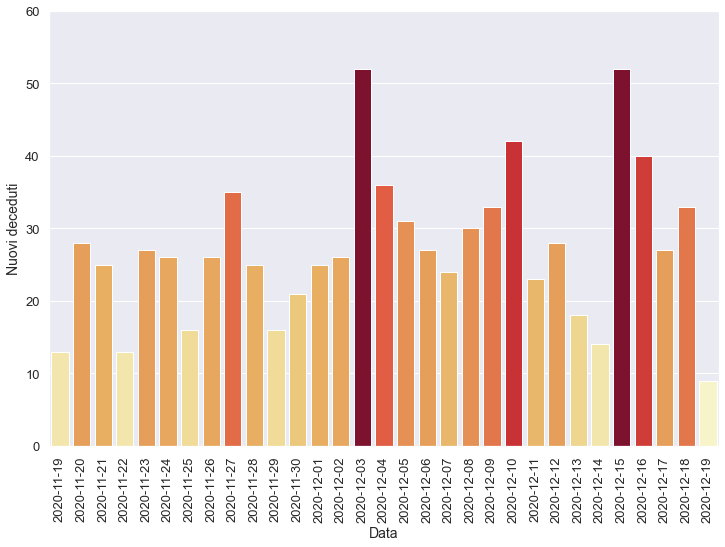

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

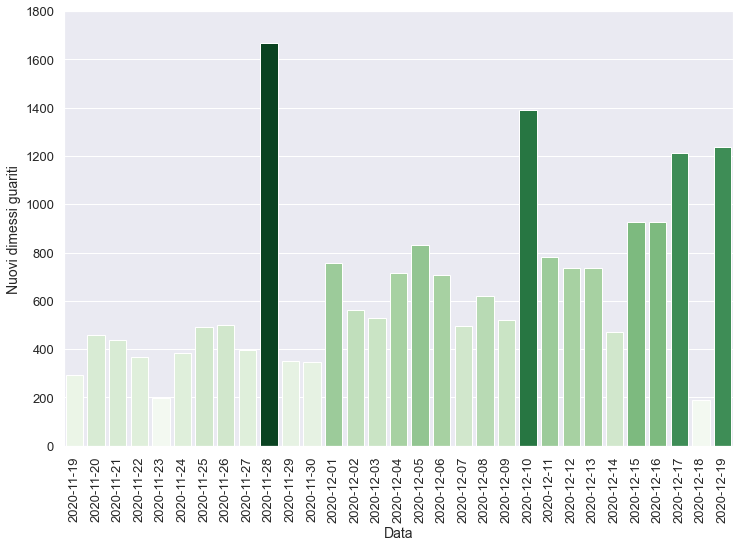

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-12T17:00:00,6,Friuli Venezia Giulia,654,59,713,13642,14355,120,884,...,28.0,8444.0,732.0,114.0,8.27,4.97,10.47,120.77,-6.35,0.84
1,2020-12-13T17:00:00,6,Friuli Venezia Giulia,655,60,715,13458,14173,-182,573,...,18.0,6785.0,3618.0,-184.0,8.39,5.04,8.45,15.84,1.69,-1.27
2,2020-12-14T17:00:00,6,Friuli Venezia Giulia,660,58,718,13370,14088,-85,402,...,14.0,3253.0,849.0,-88.0,8.08,5.10,12.36,47.35,-3.33,-0.60
3,2020-12-15T17:00:00,6,Friuli Venezia Giulia,654,56,710,13229,13939,-149,829,...,52.0,9766.0,3845.0,-141.0,7.89,5.09,8.49,21.56,-3.45,-1.06
4,2020-12-16T17:00:00,6,Friuli Venezia Giulia,634,54,688,13063,13751,-188,779,...,40.0,8826.0,2002.0,-166.0,7.85,5.00,8.83,38.91,-3.57,-1.35
5,2020-12-17T17:00:00,6,Friuli Venezia Giulia,630,57,687,12534,13221,-530,707,...,27.0,9096.0,1938.0,-529.0,8.30,5.20,7.77,36.48,5.56,-3.85
6,2020-12-18T17:00:00,6,Friuli Venezia Giulia,601,59,660,13091,13751,530,753,...,33.0,7781.0,0.0,557.0,8.94,4.80,9.68,0.00,3.51,4.01
7,2020-12-19T17:00:00,6,Friuli Venezia Giulia,594,55,649,12831,13480,-271,974,...,9.0,10096.0,4865.0,-260.0,8.47,4.81,9.65,20.02,-6.78,-1.97


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

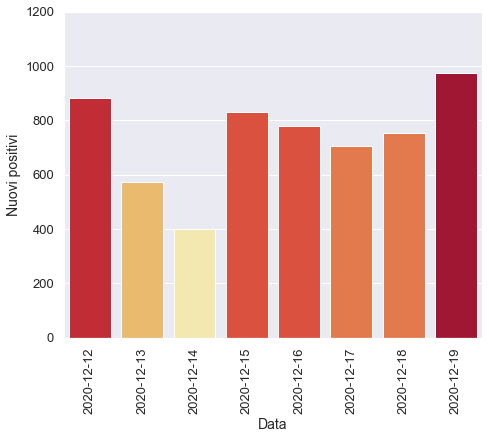

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

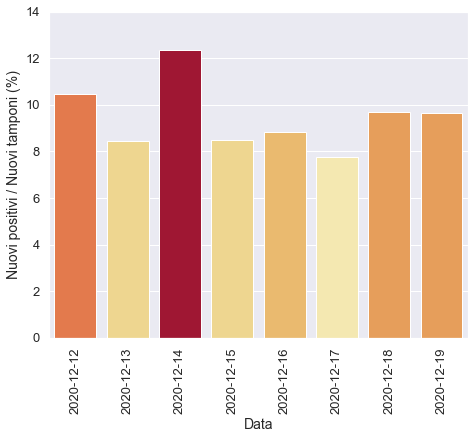

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

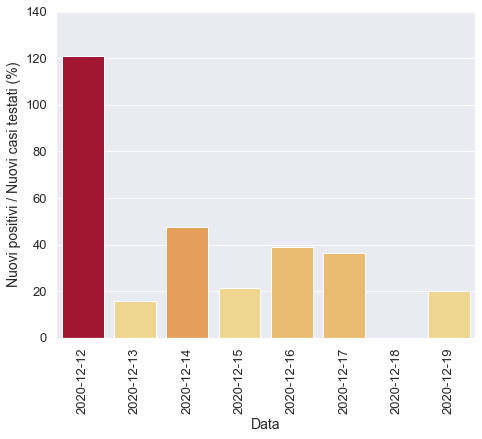

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

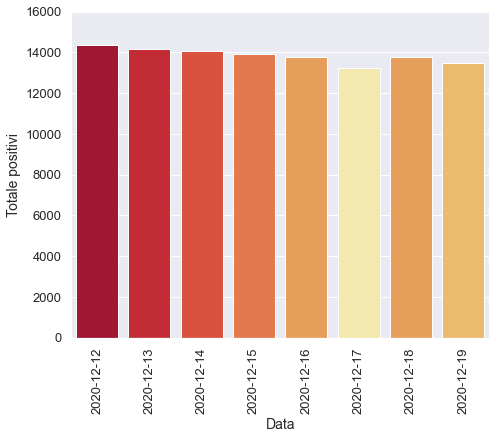

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

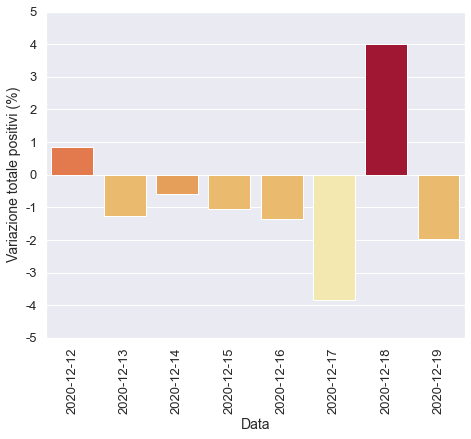

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

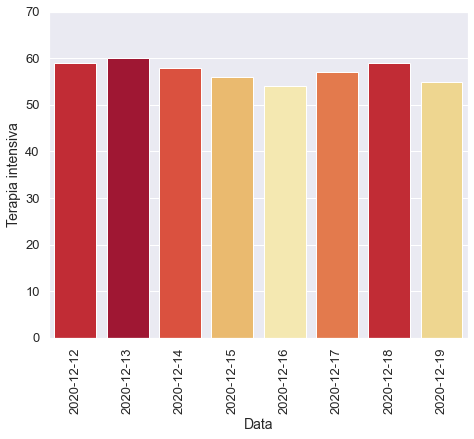

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

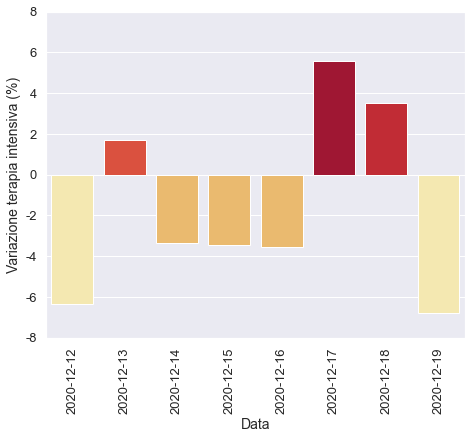

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

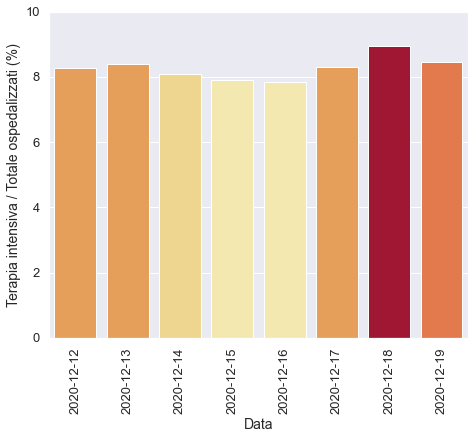

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

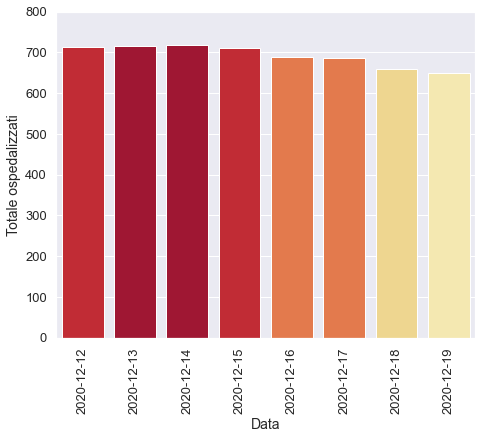

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

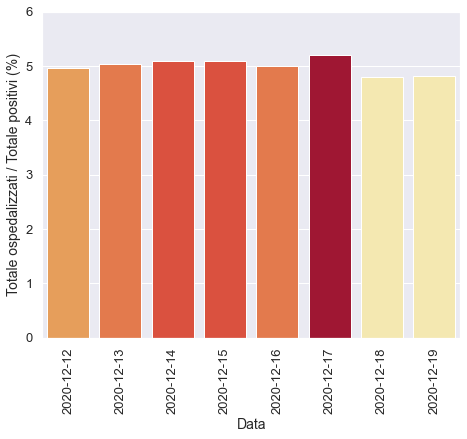

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

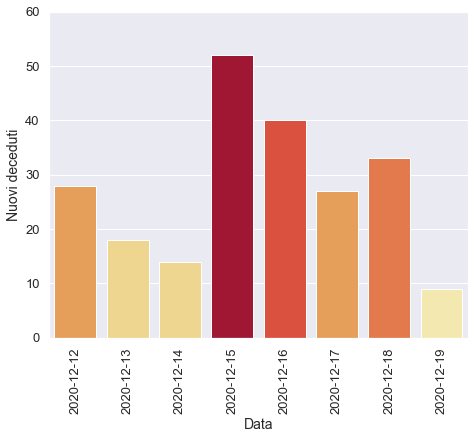

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

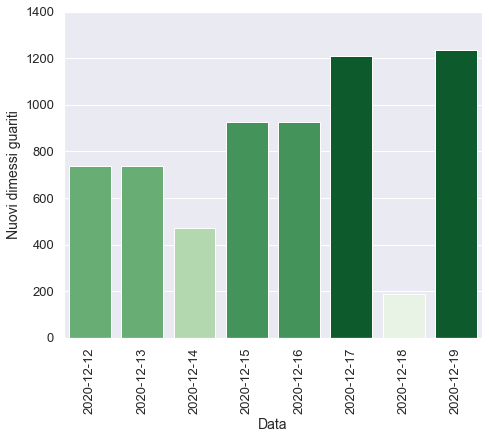

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)